In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
import math
from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split, learning_curve, LearningCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [3]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [4]:
import plotly.express as px

In [5]:
def print_num_unique_entries(df):
    for each in df.columns:
        print('Number of unique entries in', each, ':', len(df[each].unique()))
    
def print_unique_entries(df):
    for each in df.columns:
        print('Unique entries in', each, ':', df[each].unique())

---
# Question-1
---

## Data preprocessing and Visualization

In [6]:
df = pd.read_csv('train.csv')
df_raw = df.copy()

In [7]:
df

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel   
0                0   70172    Male     Loyal Customer   13  Personal Travel  \
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service   
0       Eco Plus              460                      3  \
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment   
0                                       4  ...                       5  \
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service   
0                      4                 3                 4                4  \
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes   
0                      5            5                          25  \
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [10]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)
df

Gender      Customer Type  Age   Type of Travel     Class   
0         Male     Loyal Customer   13  Personal Travel  Eco Plus  \
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service   
0                   460                      3  \
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking   
0                                       4                       3  \
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  ...  Inflight entertainment  On-board service   
0                   1  ...                       5                 4  \
1                   3  ...                       1                 1   
2                   2  ...                       5                 4   
3                   5  ...                       2                 2   
4                   3  ...                       3                 3   
...               ...  ...                     ...               ...   
103899              3  ...                       2                 3   
103900              4  ...                       5                 5   
103901              3  ...                       4                 3   
103902              5  ...                       1                 4   
103903              3  ...                       1                 1   

        Leg room service  Baggage handling  Checkin service  Inflight service   
0                      3                 4                4                 5  \
1                      5                 3                1                 4   
2                      3                 4                4                 4   
3                      5                 3                1                 4   
4                      4                 4                3                 3   
...                  ...               ...              ...               ...   
103899                 1                 4                2                 3   
103900                 5                 5                5                 5   
103901                 2                 4                5                 5   
103902                 5                 1                5               

In [11]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [12]:
df = df.dropna()

In [13]:
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [14]:
for each in categorical_features:
    df[each] = df[each].astype('category')
    df[each] = df[each].cat.codes

In [15]:
df

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance   
0            1              0   13               1      2              460  \
1            1              1   25               0      0              235   
2            0              0   26               0      0             1142   
3            0              0   25               0      0              562   
4            1              0   61               0      0              214   
...        ...            ...  ...             ...    ...              ...   
103899       0              1   23               0      1              192   
103900       1              0   49               0      0             2347   
103901       1              1   30               0      0             1995   
103902       0              1   22               0      1             1000   
103903       1              0   27               0      0             1723   

        Inflight wifi service  Departure/Arrival time convenient   
0                           3                                  4  \
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  ...  Inflight entertainment   
0                            3              1  ...                       5  \
1                            3              3  ...                       1   
2                            2              2  ...                       5   
3                            5              5  ...                       2   
4                            3              3  ...                       3   
...                        ...            ...  ...                     ...   
103899                       2              3  ...                       2   
103900                       4              4  ...                       5   
103901                       1              3  ...                       4   
103902                       1              5  ...                       1   
103903                       3              3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service   
0                      4                 3                 4                4  \
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes   
0                      5            5                          25  \
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   

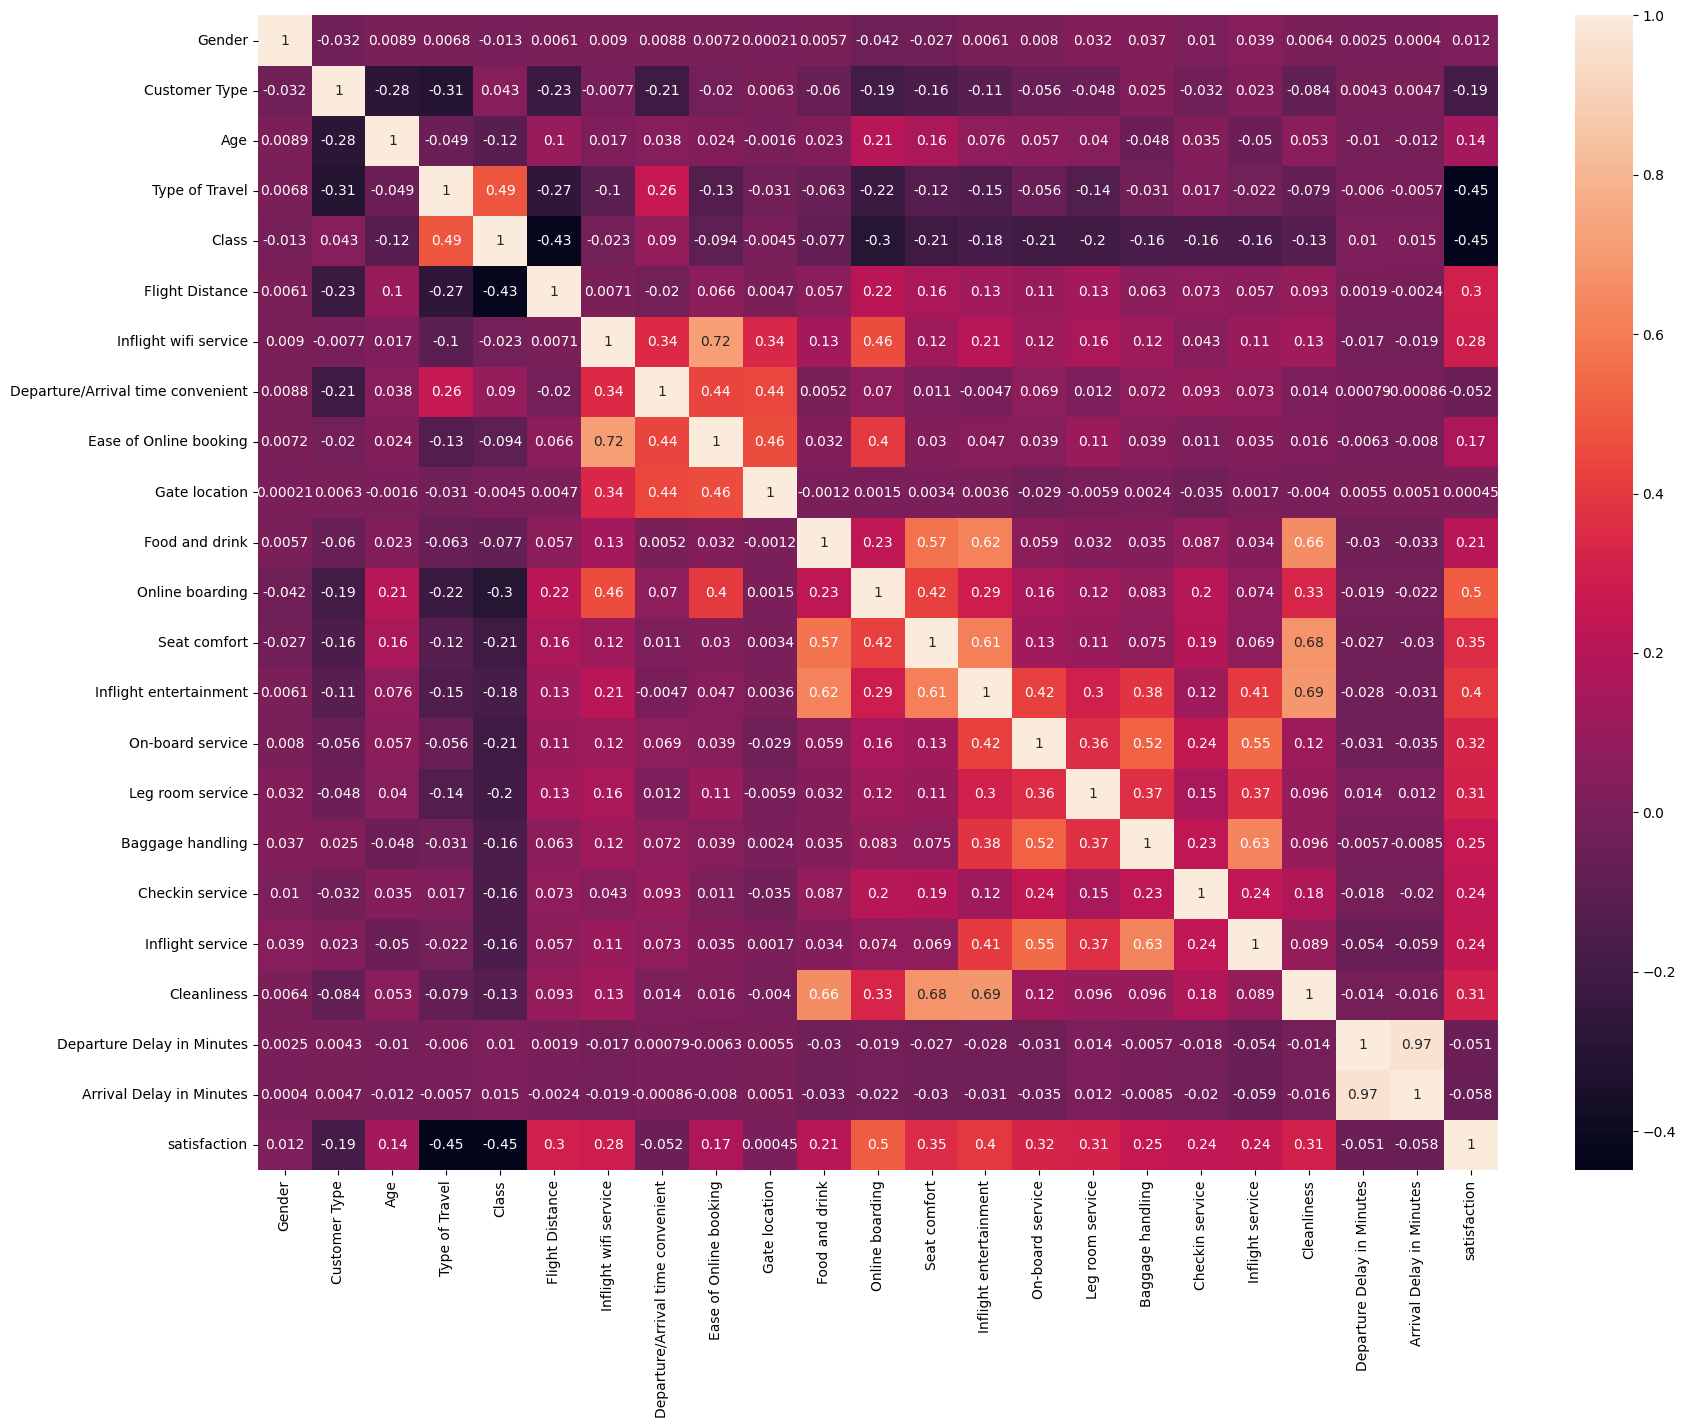

In [16]:
fig = plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
# Since Arrival and Departure delays are closely correlated, we could have decided to combine them

In [18]:
# df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']
# df = df.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)
# df

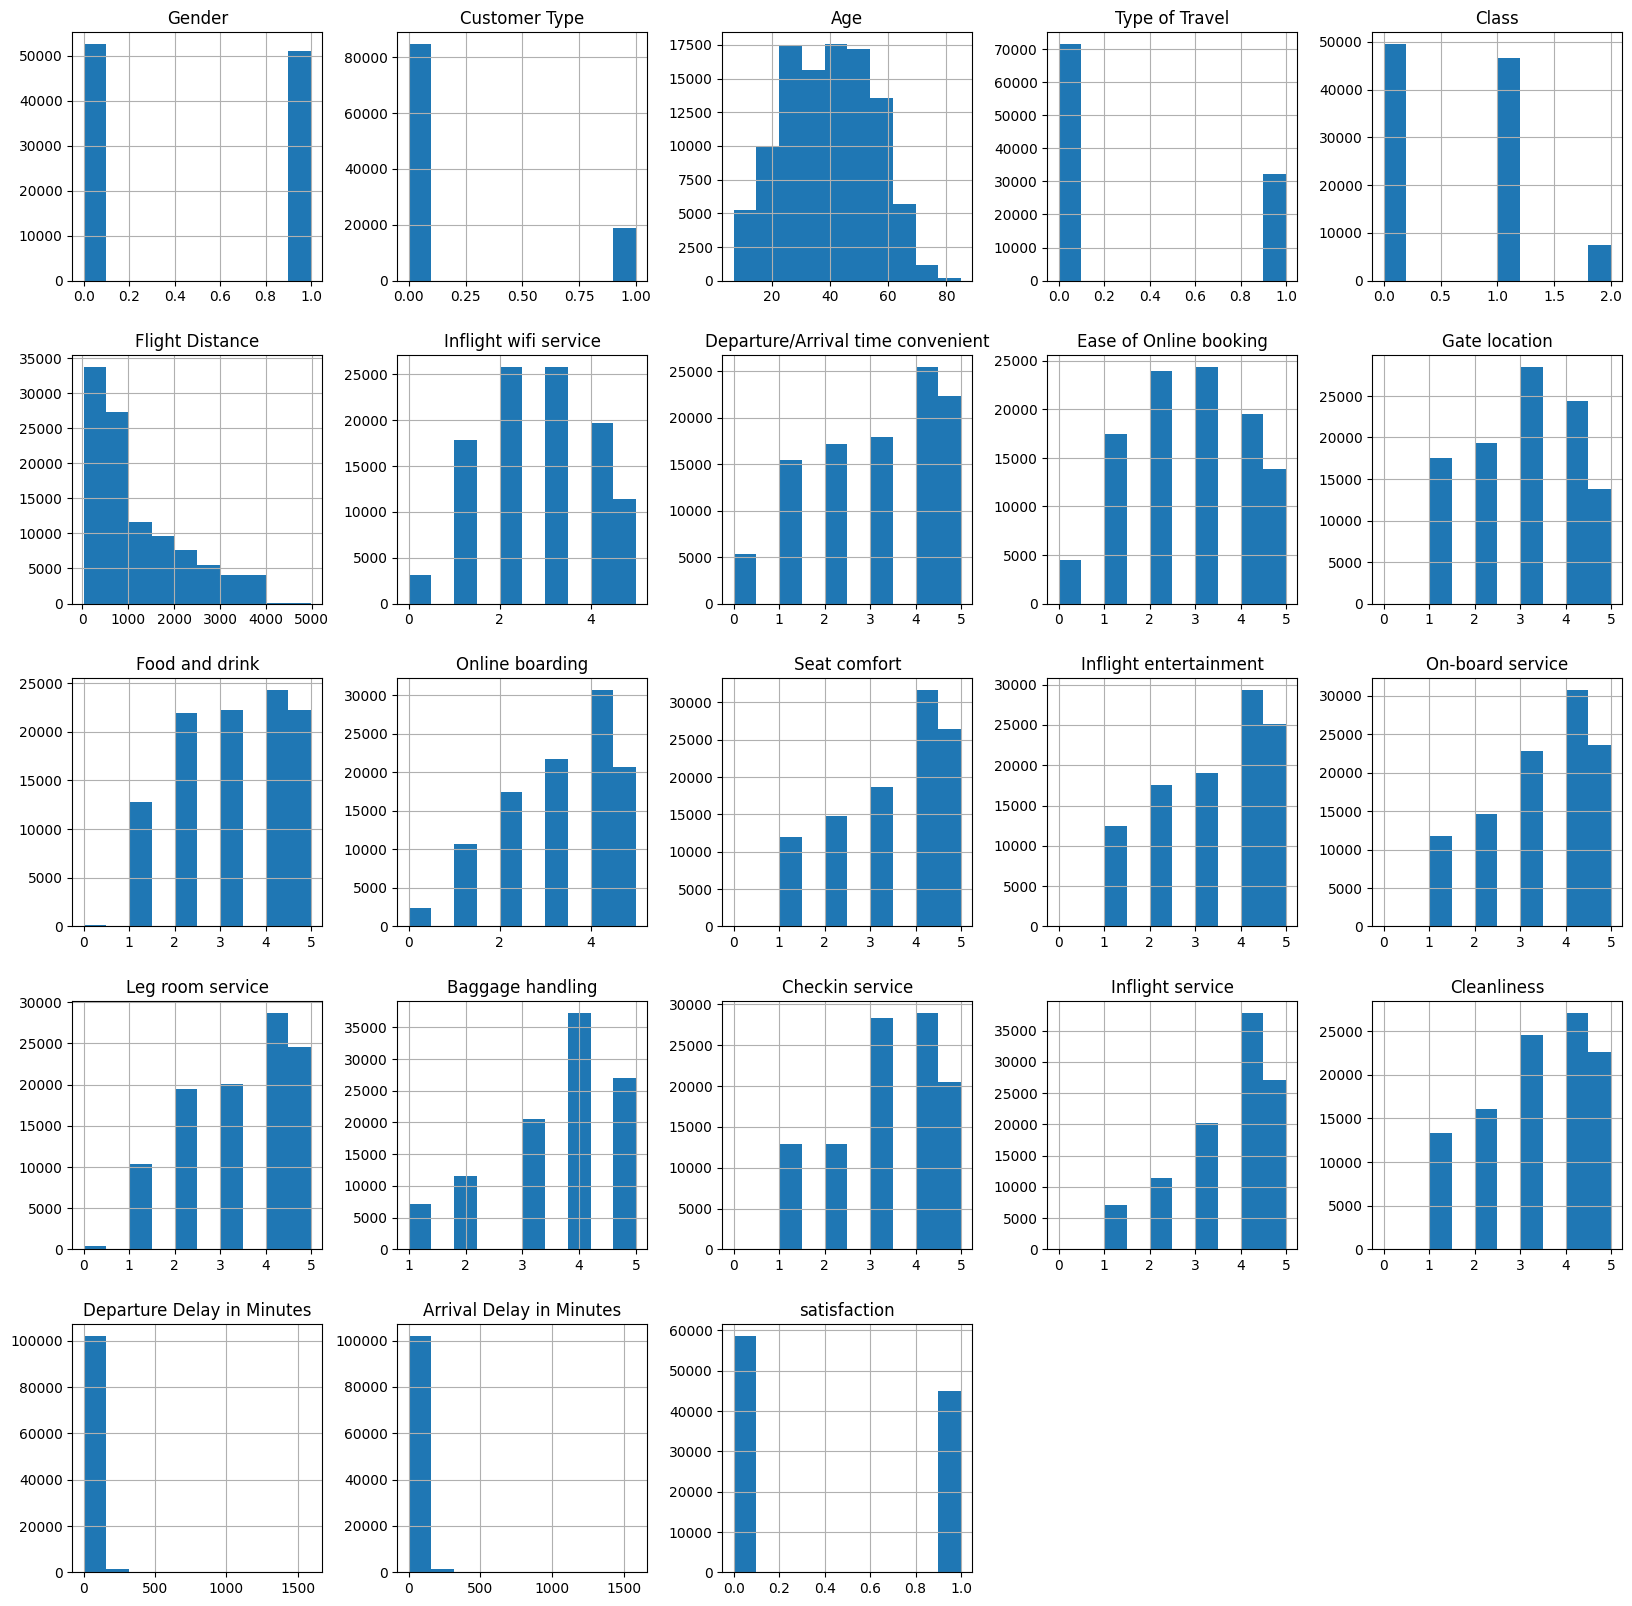

In [19]:
df.hist(figsize=(20,20))
plt.show()

In [20]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [21]:
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [22]:
X = df[features]
y = df['satisfaction']

In [23]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = features

In [24]:
X_scaled

Gender  Customer Type       Age  Type of Travel     Class   
0       1.015154      -0.472883 -1.745542        1.491414  2.265027  \
1       1.015154       2.114687 -0.951526       -0.670505 -0.956789   
2      -0.985072      -0.472883 -0.885358       -0.670505 -0.956789   
3      -0.985072      -0.472883 -0.951526       -0.670505 -0.956789   
4       1.015154      -0.472883  1.430521       -0.670505 -0.956789   
...          ...            ...       ...             ...       ...   
103589 -0.985072       2.114687 -1.083862       -0.670505  0.654119   
103590  1.015154      -0.472883  0.636505       -0.670505 -0.956789   
103591  1.015154       2.114687 -0.620686       -0.670505 -0.956789   
103592 -0.985072       2.114687 -1.150030       -0.670505  0.654119   
103593  1.015154      -0.472883 -0.819190       -0.670505 -0.956789   

        Flight Distance  Inflight wifi service   
0             -0.731305               0.203521  \
1             -0.956916               0.203521   
2             -0.047454              -0.549571   
3             -0.629028              -0.549571   
4             -0.977973               0.203521   
...                 ...                    ...   
103589        -1.000033              -0.549571   
103590         1.160818               0.956612   
103591         0.807862              -1.302662   
103592        -0.189839              -1.302662   
103593         0.535124              -1.302662   

        Departure/Arrival time convenient  Ease of Online booking   
0                                0.616249                0.173716  \
1                               -0.695032                0.173716   
2                               -0.695032               -0.541118   
3                                1.271890                1.603383   
4                               -0.039391                0.173716   
...                                   ...                     ...   
103589                          -1.350673               -0.541118   
103590                           0.616249                0.888550   
103591                          -1.350673               -1.255951   
103592                          -1.350673               -1.255951   
103593                          -0.039391                0.173716   

        Gate location  ...  Seat comfort  Inflight entertainment   
0           -1.547312  ...      1.182991                1.231530  \
1            0.017981  ...     -1.849863               -1.769166   
2           -0.764666  ...      1.182991                1.231530   
3            1.583273  ...     -1.091649               -1.018992   
4            0.017981  ...      1.182991               -0.268818   
...               ...  ...           ...                     ...   
103589       0.017981  ...     -1.091649               -1.018992   
103590       0.800627  ...      1.182991                1.231530   
103591       0.017981  ...      1.182991                0.481356   
103592       1.583273  ...     -1.849863               -1.769166   
103593       0.017981  ...     -1.849863               -1.769166   

        On-board service  Leg room service  Baggage handling  Checkin service   
0               0.479237         -0.267143          0.311853         0.549773  \
1              -1.849452          1.253304         -0.534854        -1.821038   
2               0.479237         -0.267143          0.311853         0.549773   
3              -1.073222          1.253304         -0.534854        -1.821038   
4              -0.296993          0.493081          0.311853        -0.240497   
...                  ...               ...               ...              ...   
103589         -0.296993         -1.787590          0.311853        -1.030767   
103590          1.255467          1.253304          1.158561         1.340043   
103591         -0.296993         -1.027367          0.311853         1.340043   
103592          0.479237          1.253304         -2.228269         1.340043   
103593         -1.8

In [25]:
X = X_scaled

### SFS

In [26]:
sfs1 = SFS(DecisionTreeClassifier(), k_features=10, forward=True, floating=False, scoring='accuracy')

In [27]:
sfs1 = sfs1.fit(X, y)

In [28]:
sfs1.subsets_

{1: {'feature_idx': (11,),
  'cv_scores': array([0.78942034, 0.79279888, 0.79038564, 0.79260582, 0.78646588]),
  'avg_score': 0.7903353102550807,
  'feature_names': ('Online boarding',)},
 2: {'feature_idx': (3, 11),
  'cv_scores': array([0.84806217, 0.85201989, 0.84796564, 0.85168203, 0.84834443]),
  'avg_score': 0.8496148302952342,
  'feature_names': ('Type of Travel', 'Online boarding')},
 3: {'feature_idx': (3, 6, 11),
  'cv_scores': array([0.89203147, 0.89299677, 0.8893769 , 0.89304503, 0.88879235]),
  'avg_score': 0.8912485041976396,
  'feature_names': ('Type of Travel',
   'Inflight wifi service',
   'Online boarding')},
 4: {'feature_idx': (3, 6, 9, 11),
  'cv_scores': array([0.91939765, 0.92306579, 0.9190598 , 0.92451373, 0.92253113]),
  'avg_score': 0.9217136206489922,
  'feature_names': ('Type of Travel',
   'Inflight wifi service',
   'Gate location',
   'Online boarding')},
 5: {'feature_idx': (3, 6, 9, 11, 16),
  'cv_scores': array([0.92721656, 0.93040205, 0.92745789, 0.9

In [29]:
sfs1.k_feature_names_

('Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Ease of Online booking',
 'Gate location',
 'Online boarding',
 'Seat comfort',
 'Baggage handling',
 'Inflight service')

In [30]:
sfs1.k_score_

0.9506149080063931

## Toggling between SFS, SBS, SFFS, and SBFS

### Sequential Forward Selection

In [31]:
sfs = SFS(DecisionTreeClassifier(), k_features=10, forward=True, floating=False, cv=4)
sfs = sfs.fit(X, y)

In [32]:
sfs.k_score_

0.9500839904382599

### Sequential Backward Selection

In [33]:
sbs = SFS(DecisionTreeClassifier(), k_features=10, forward=False, floating=False, cv=4)
sbs = sbs.fit(X, y)

In [34]:
sbs.k_score_

0.9478734539163436

### Sequential Forward Floating Selection

In [35]:
sffs = SFS(DecisionTreeClassifier(), k_features=10, forward=True, floating=True, cv=4)
sffs = sffs.fit(X, y)

In [36]:
sffs.k_score_

0.9512809635042744

### Sequential Backward Floating Selection

In [37]:
sbfs = SFS(DecisionTreeClassifier(), k_features=10, forward=True, floating=False, cv=4)
sbfs = sbfs.fit(X, y)

In [38]:
sbfs.k_score_

0.9500839900655329

## Visualization of the output from the feature selection in Pandas DataFrames

In [39]:
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df

feature_idx   
1                                 (11,)  \
2                               (3, 11)   
3                            (3, 6, 11)   
4                         (3, 6, 9, 11)   
5                      (1, 3, 6, 9, 11)   
6                  (1, 3, 6, 9, 11, 16)   
7               (1, 3, 4, 6, 9, 11, 16)   
8           (1, 3, 4, 6, 9, 11, 16, 18)   
9       (1, 3, 4, 6, 9, 11, 12, 16, 18)   
10  (1, 3, 4, 6, 9, 11, 12, 13, 16, 18)   

                                            cv_scores avg_score   
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335  \
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393798988377929, 0.9425074327194101, 0.939...   0.94129   
7   [0.9463299741302753, 0.9485308313062281, 0.948...  0.948202   
8   [0.949611954129503, 0.9503069616587513, 0.9508...  0.950634   
9   [0.9487625004826441, 0.9510791922468049, 0.951...  0.950972   
10  [0.9490327811884629, 0.950229738599946, 0.9497...  0.950084   

                                        feature_names  ci_bound   std_dev   
1                                  (Online boarding,)  0.004065  0.002536  \
2                   (Type of Travel, Online boarding)  0.002085    0.0013   
3   (Type of Travel, Inflight wifi service, Online...  0.002214  0.001381   
4   (Type of Travel, Inflight wifi service, Gate l...  0.002346  0.001463   
5   (Customer Type, Type of Travel, Inflight wifi ...  0.001202   0.00075   
6   (Customer Type, Type of Travel, Inflight wifi ...  0.002887  0.001801   
7   (Customer Type, Type of Travel, Class, Infligh...  0.001839  0.001148   
8   (Customer Type, Type of Travel, Class, Infligh...  0.001284  0.000801   
9   (Customer Type, Type of Travel, Class, Infligh...  0.002255  0.001407   
10  (Customer Type, Type of Travel, Class, Infligh...  0.001353  0.000844   

     std_err  
1   0.001464  
2   0.000751  
3   0.000797  
4   0.000845  
5   0.000433  
6    0.00104  
7   0.000663  
8   0.000462  
9   0.000812  
10  0.000487

In [40]:
sbs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sbs_df

feature_idx   
1                                 (11,)  \
2                               (3, 11)   
3                            (3, 6, 11)   
4                         (3, 6, 9, 11)   
5                      (1, 3, 6, 9, 11)   
6                  (1, 3, 6, 9, 11, 16)   
7               (1, 3, 4, 6, 9, 11, 16)   
8           (1, 3, 4, 6, 9, 11, 16, 18)   
9       (1, 3, 4, 6, 9, 11, 12, 16, 18)   
10  (1, 3, 4, 6, 9, 11, 12, 13, 16, 18)   

                                            cv_scores avg_score   
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335  \
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393798988377929, 0.9425074327194101, 0.939...   0.94129   
7   [0.9463299741302753, 0.9485308313062281, 0.948...  0.948202   
8   [0.949611954129503, 0.9503069616587513, 0.9508...  0.950634   
9   [0.9487625004826441, 0.9510791922468049, 0.951...  0.950972   
10  [0.9490327811884629, 0.950229738599946, 0.9497...  0.950084   

                                        feature_names  ci_bound   std_dev   
1                                  (Online boarding,)  0.004065  0.002536  \
2                   (Type of Travel, Online boarding)  0.002085    0.0013   
3   (Type of Travel, Inflight wifi service, Online...  0.002214  0.001381   
4   (Type of Travel, Inflight wifi service, Gate l...  0.002346  0.001463   
5   (Customer Type, Type of Travel, Inflight wifi ...  0.001202   0.00075   
6   (Customer Type, Type of Travel, Inflight wifi ...  0.002887  0.001801   
7   (Customer Type, Type of Travel, Class, Infligh...  0.001839  0.001148   
8   (Customer Type, Type of Travel, Class, Infligh...  0.001284  0.000801   
9   (Customer Type, Type of Travel, Class, Infligh...  0.002255  0.001407   
10  (Customer Type, Type of Travel, Class, Infligh...  0.001353  0.000844   

     std_err  
1   0.001464  
2   0.000751  
3   0.000797  
4   0.000845  
5   0.000433  
6    0.00104  
7   0.000663  
8   0.000462  
9   0.000812  
10  0.000487

In [41]:
sffs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sffs_df

feature_idx   
1                                 (11,)  \
2                               (3, 11)   
3                            (3, 6, 11)   
4                         (3, 6, 9, 11)   
5                      (1, 3, 6, 9, 11)   
6                  (1, 3, 6, 9, 11, 16)   
7               (1, 3, 4, 6, 9, 11, 16)   
8           (1, 3, 4, 6, 9, 11, 16, 18)   
9       (1, 3, 4, 6, 9, 11, 12, 16, 18)   
10  (1, 3, 4, 6, 9, 11, 12, 13, 16, 18)   

                                            cv_scores avg_score   
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335  \
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393798988377929, 0.9425074327194101, 0.939...   0.94129   
7   [0.9463299741302753, 0.9485308313062281, 0.948...  0.948202   
8   [0.949611954129503, 0.9503069616587513, 0.9508...  0.950634   
9   [0.9487625004826441, 0.9510791922468049, 0.951...  0.950972   
10  [0.9490327811884629, 0.950229738599946, 0.9497...  0.950084   

                                        feature_names  ci_bound   std_dev   
1                                  (Online boarding,)  0.004065  0.002536  \
2                   (Type of Travel, Online boarding)  0.002085    0.0013   
3   (Type of Travel, Inflight wifi service, Online...  0.002214  0.001381   
4   (Type of Travel, Inflight wifi service, Gate l...  0.002346  0.001463   
5   (Customer Type, Type of Travel, Inflight wifi ...  0.001202   0.00075   
6   (Customer Type, Type of Travel, Inflight wifi ...  0.002887  0.001801   
7   (Customer Type, Type of Travel, Class, Infligh...  0.001839  0.001148   
8   (Customer Type, Type of Travel, Class, Infligh...  0.001284  0.000801   
9   (Customer Type, Type of Travel, Class, Infligh...  0.002255  0.001407   
10  (Customer Type, Type of Travel, Class, Infligh...  0.001353  0.000844   

     std_err  
1   0.001464  
2   0.000751  
3   0.000797  
4   0.000845  
5   0.000433  
6    0.00104  
7   0.000663  
8   0.000462  
9   0.000812  
10  0.000487

In [42]:
sbfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sbfs_df

feature_idx   
1                                 (11,)  \
2                               (3, 11)   
3                            (3, 6, 11)   
4                         (3, 6, 9, 11)   
5                      (1, 3, 6, 9, 11)   
6                  (1, 3, 6, 9, 11, 16)   
7               (1, 3, 4, 6, 9, 11, 16)   
8           (1, 3, 4, 6, 9, 11, 16, 18)   
9       (1, 3, 4, 6, 9, 11, 12, 16, 18)   
10  (1, 3, 4, 6, 9, 11, 12, 13, 16, 18)   

                                            cv_scores avg_score   
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335  \
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393798988377929, 0.9425074327194101, 0.939...   0.94129   
7   [0.9463299741302753, 0.9485308313062281, 0.948...  0.948202   
8   [0.949611954129503, 0.9503069616587513, 0.9508...  0.950634   
9   [0.9487625004826441, 0.9510791922468049, 0.951...  0.950972   
10  [0.9490327811884629, 0.950229738599946, 0.9497...  0.950084   

                                        feature_names  ci_bound   std_dev   
1                                  (Online boarding,)  0.004065  0.002536  \
2                   (Type of Travel, Online boarding)  0.002085    0.0013   
3   (Type of Travel, Inflight wifi service, Online...  0.002214  0.001381   
4   (Type of Travel, Inflight wifi service, Gate l...  0.002346  0.001463   
5   (Customer Type, Type of Travel, Inflight wifi ...  0.001202   0.00075   
6   (Customer Type, Type of Travel, Inflight wifi ...  0.002887  0.001801   
7   (Customer Type, Type of Travel, Class, Infligh...  0.001839  0.001148   
8   (Customer Type, Type of Travel, Class, Infligh...  0.001284  0.000801   
9   (Customer Type, Type of Travel, Class, Infligh...  0.002255  0.001407   
10  (Customer Type, Type of Travel, Class, Infligh...  0.001353  0.000844   

     std_err  
1   0.001464  
2   0.000751  
3   0.000797  
4   0.000845  
5   0.000433  
6    0.00104  
7   0.000663  
8   0.000462  
9   0.000812  
10  0.000487

## Plotting the results

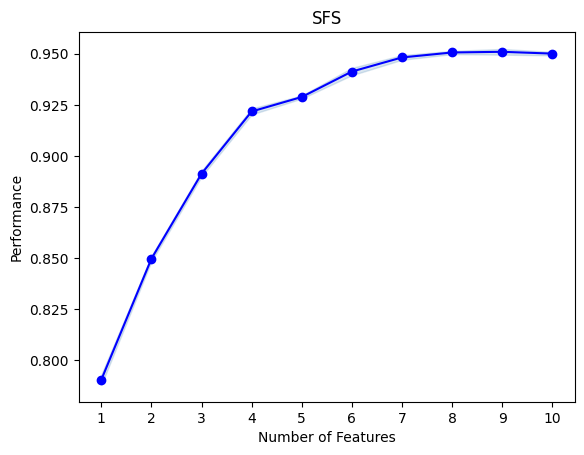

In [43]:
fig = plot_sfs(sfs.get_metric_dict())
plt.title('SFS')
plt.show()

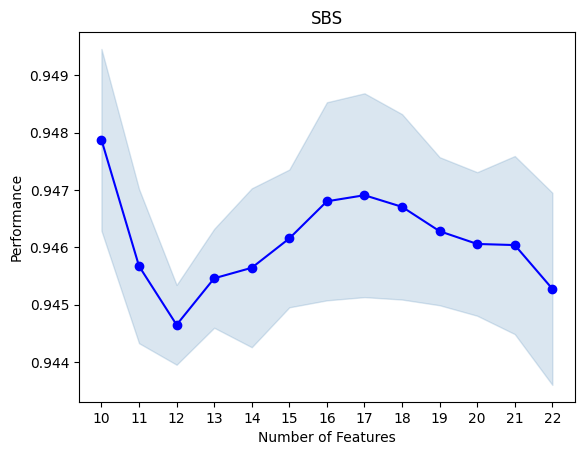

In [44]:
fig = plot_sfs(sbs.get_metric_dict())
plt.title('SBS')
plt.show()

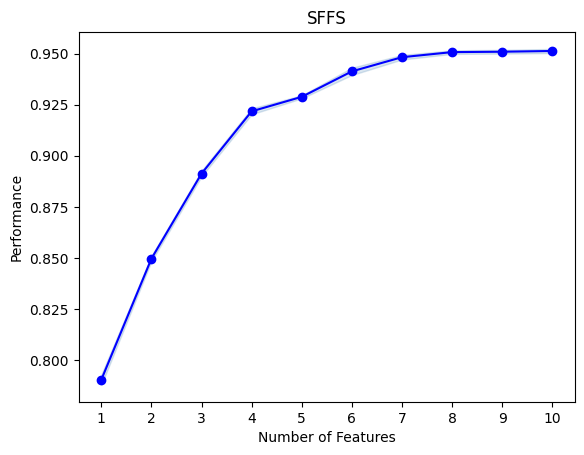

In [45]:
fig = plot_sfs(sffs.get_metric_dict())
plt.title('SFFS')
plt.show()

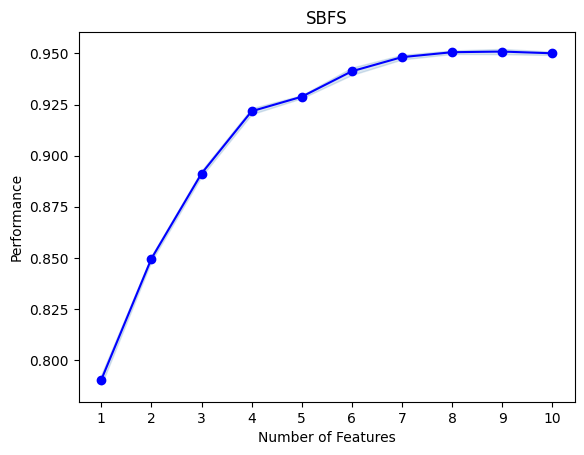

In [46]:
fig = plot_sfs(sbfs.get_metric_dict())
plt.title('SBFS')
plt.show()

## Bi-directional Feature Set Generation Algorithm implementation from scratch

In [26]:
class BidirectionalFeatureSetGeneration:
    def __init__(self, similarity_measure='accuracy', model='Decision Tree'):
        '''
        Input: similarity measure (default='accuracy')
               estimator model (defaul='Decision Tree')
        
        Constructor for the bidirectional feature set generation class
        '''
        self.similarity_measure = similarity_measure
        self.model = model

        
    def fit(self, X, y, features=None, print_things=True):
        '''
        Input: dataset and labels,
               array of features (if the dataset is not a pandas dataframe),
               an optional parameter to print the iteration information of the feature selection methods
        
        Finds the best features for the input dataset using bidirectional feature set generation
        '''
        self.X = X
        self.y = y
        
        if features == None:
            self.features = X.columns.tolist()
        else:
            self.features = features
            
        train_X, test_X, train_y, test_y = train_test_split(self.X, self.y, random_state=42)
            
        self.distance_measures = {'angular separation': self.angular_separation,
                                  'euclidean distance': self.euclidean_distance,
                                  'city-block distance': self.city_block_distance}
            
        if self.similarity_measure == 'accuracy':
            self.all_features_measure = self.accuracy_measure(train_X, train_y, test_X, test_y)
            self.f_prev_measure = 0
            self.b_prev_measure = 0
        elif self.similarity_measure == 'information gain':
            self.all_features_measure = self.information_gain(train_X, train_y, test_X, test_y)
            self.f_prev_measure = 0
            self.b_prev_measure = 0
        else:
            pred_y = self.get_pred_y(train_X, train_y, test_X)
            self.all_features_measure = self.distance_measures[self.similarity_measure](test_y, pred_y)    
            self.f_prev_measure = float('inf')
            self.b_prev_measure = float('inf')
        
        self.algo(print_things=print_things)
        
    
    def get_pred_y(self, train_X, train_y, test_X, model=None):
        '''
        Input: training dataset and labels,
               testing dataset,
               model for prediction (default = Decision Tree Classifier)
        
        Returns the predictions for the input testing data
        '''
        if model == None:
            model = DecisionTreeClassifier()
            
        model.fit(train_X, train_y)
        pred_y = model.predict(test_X)
        
        return pred_y

    
    def tp_tn_fp_fn(self, train_X, train_y, test_X, test_y, model=None):
        '''
        Input: training dataset and labels,
               testing dataset and labels,
               model for prediction (default = Decision Tree Classifier)
        
        Returns tuple containing (true positives, true neagtives, false positives, false negatives)
        '''
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        
        test_y = np.array(test_y)
        pred_y = self.get_pred_y(train_X, train_y, test_X, model)
        
        for each in range(len(test_y)):
            if test_y[each]==1 and pred_y[each]==1:
                tp += 1
            elif test_y[each]==1 and pred_y[each]==0:
                fn += 1
            elif test_y[each]==0 and pred_y[each]==1:
                fp += 1
            else:
                tn += 1
        
        return (tp+1e-15, tn+1e-15, fp+1e-15, fn+1e-15)
        
        
    def angular_separation(self, x, y):
        '''
        Input: two datapoints
        
        Returns the euclidean distance between the two datapoints
        '''
        x = np.array(x)
        y = np.array(y)
        return np.sum(x*y) / np.sqrt(np.sum(x**2) * (np.sum(y**2)))

    
    def euclidean_distance(self, x, y):
        '''
        Input: two datapoints
        
        Returns the euclidean distance between the two datapoints
        '''
        x = np.array(x)
        y = np.array(y)
        return np.linalg.norm(np.array(x) - np.array(y))
    
    
    def city_block_distance(self, x, y):
        '''
        Input: two datapoints
        
        Returns the city-block distance between the inputs
        '''
        x = np.array(x)
        y = np.array(y)
        return np.sum(np.abs(x - y))
    
        
    def accuracy_measure(self, train_X, train_y, test_X, test_y):
        '''
        Input: training dataset and labels,
               testing dataset and labels,
               classifier model to be used for prediction (default = Decision Tree Classifier)
        
        Returns the accuracy score for the input
        '''
        if self.model == 'Decision Tree':
            clf = DecisionTreeClassifier()

        elif self.model == 'SVM':
            clf = SVC()
        
        clf.fit(train_X, train_y)
        return clf.score(test_X, test_y)
        
    
    def information_gain(self, train_X, train_y, test_X, test_y, model=None):
        '''
        Input: training dataset and labels,
               testing dataset and labels,
               classifier model to be used for prediction (default = Decision Tree Classifier)
        
        Returns the information gain based on the input
        '''
        tp, tn, fp, fn = self.tp_tn_fp_fn(train_X, train_y, test_X, test_y, model)
        
        Sum = tp+fp+tn+fn
        Sum_pos = tp+fp
        Sum_neg = tn+fn
        
        return self.e(tp+fn, fp+tn) - ((Sum_pos*self.e(tp,fp) + Sum_neg*self.e(tn,fn)) / Sum)
        
        
    def e(self, a, b):
        '''
        Returns the entropy for the inputs provided
        '''
        Sum = a+b+1e-15
        return -((a/Sum)*math.log2(a/Sum) + (b/Sum)*math.log2(b/Sum))
        
        
    def algo(self, print_things=True):
        '''
        Feature set generation algorithm
        '''
        self.Sf = list()
        self.Sb = self.features.copy()

        f_check_var = 0
        b_check_var = 0
        
        while True:
            # check break condition
            if len(self.Sb)==0:
                break
            
            # forward selection
            if f_check_var == 0:
                ff = self.find_next(print_things=print_things)
                if ff==None:
                    f_check_var += 1
                else:
                    self.Sf.append(ff)
                    self.Sb.remove(ff)
            
            # check break condition
            if len(self.Sb)==0:
                break
                
            # backward selection
            if b_check_var == 0:
                fb = self.get_next(print_things=print_things)
                if fb==None:
                    b_check_var += 1
                else:
                    self.Sb.remove(fb)
            
            if print_things:
                print(f'selected features: {self.Sf}')
                print('*'*100)
                
            '''    
            if f_check_var == 1 and b_check_var == 0:
                break
            
            elif f_check_var == 0 and b_check_var == 1:
                self.Sf = self.Sf + self.Sb
                break
            ''' 
            
            if f_check_var == 1 and b_check_var == 1:
                if self.similarity_measure == 'accuracy' or self.similarity_measure == 'information gain':
                    if self.f_prev_measure < self.b_prev_measure:
                        self.Sf = self.Sf + self.Sb
                else:
                    if self.f_prev_measure > self.b_prev_measure:
                        self.Sf = self.Sf + self.Sb
                break
                    
            
        result = self.Sf
        print('- '*50)
        print(f'final feature set:-\n{result}')
        print('- '*50)
        print(f'no. of features: {len(result)}')
        print('- '*50)

        
    def find_next(self, print_things=True):
        '''
        Returns next best feature
        '''
        best_measure = self.f_prev_measure
        best_feature = None
        
        for f in self.Sb:
            X = self.X.copy()
            
            Sf = self.Sf.copy()
            Sf.append(f)
            
            X = X[Sf]
            trainX, testX, trainy, testy = train_test_split(X, self.y, random_state=42)
            
            if self.similarity_measure == 'accuracy':                    
                acc = self.accuracy_measure(trainX, trainy, testX, testy)
                if acc >= best_measure:
                    best_measure = acc
                    best_feature = f
                    
            elif self.similarity_measure == 'information gain':
                info_gain = self.information_gain(trainX, trainy, testX, testy)
                if info_gain >= best_measure:
                    best_measure = info_gain
                    best_feature = f
                    
            else:
                predy = self.get_pred_y(trainX, trainy, testX)
                dist_value = self.distance_measures[self.similarity_measure](testy, predy)
                if dist_value <= best_measure:
                    best_measure = dist_value
                    best_feature = f
        
        if print_things:
            print(f'similarity measure value = {best_measure}, selected feature = {best_feature}')
            
        self.f_prev_measure = best_measure
        return best_feature
    
    
    def get_next(self, print_things=True):
        '''
        Returns next worst feature
        '''
        best_measure = self.b_prev_measure
        worst_feature = None
        
        for f in self.Sb:
            X = self.X.copy()
            
            Sb = self.Sb.copy()
            Sb = Sb + self.Sf.copy()
            Sb.remove(f)
            
            X = X[Sb]
            trainX, testX, trainy, testy = train_test_split(X, self.y, random_state=42)

            if self.similarity_measure == 'accuracy':                    
                acc = self.accuracy_measure(trainX, trainy, testX, testy)
                if acc >= best_measure:
                    best_measure = acc
                    worst_feature = f
                    
            elif self.similarity_measure == 'information gain':
                info_gain = self.information_gain(trainX, trainy, testX, testy)
                if info_gain >= best_measure:
                    best_measure = info_gain
                    worst_feature = f
                    
            else:
                predy = self.get_pred_y(trainX, trainy, testX)
                dist_value = self.distance_measures[self.similarity_measure](testy, predy)
                if dist_value <= best_measure:
                    best_measure = dist_value
                    worst_feature = f
        
        if print_things:
            print(f'similarity measure value = {best_measure}, removed feature = {worst_feature}')
        
        self.b_prev_measure = best_measure
        return worst_feature
    
    
    def result(self):
        '''
        Returns the array of the best features
        '''
        return self.Sf
    
    
    def classification_results(self, model):
        '''
        Input: classifier model of user's choice
        
        Returns the classification results for the 
        selected features set of the data using the classifier
        '''
        train_X, test_X, train_y, test_y = train_test_split(self.X[self.Sf], self.y, random_state=42)
        model.fit(train_X, train_y)
        score = model.score(test_X, test_y)
        print(f'accuracy score: {score}')
    

## Showing classification results for the generated feature set 

In [27]:
def bidirectional_feature_set_generation_different_measures(X, y, measure, model=DecisionTreeClassifier):
    bfsg = BidirectionalFeatureSetGeneration(similarity_measure=measure)
    bfsg.fit(X, y, print_things=False)
    model = DecisionTreeClassifier()
    bfsg.classification_results(model)

In [28]:
similarity_measures = ['accuracy', 'information gain', 'angular separation',
                       'euclidean distance', 'city-block distance']

In [30]:
for each in similarity_measures:
    print(f'similarity measure: {each}')
    bidirectional_feature_set_generation_different_measures(X, y, each)
    print()
    print('#'*100)
    print()

similarity measure: accuracy
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
final feature set:-
['Online boarding', 'Type of Travel', 'Inflight wifi service', 'Gate location', 'Inflight service', 'Customer Type', 'Class', 'Baggage handling', 'Seat comfort']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
no. of features: 9
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
accuracy score: 0.9524305957758987

####################################################################################################

similarity measure: information gain
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
final feature set:-
['Online boarding', 'Type of Travel', 'Inflight wifi service', 'Gate location', 'Inflight service', 'Customer Type', 'Class', 'Baggage handling', 'Seat comfort']
- - - - -

---
# Question - 2
---

## Dataset creation

In [6]:
cov_mat = np.array([[0.6006771, 0.14889879, 0.244939],
           [0.14889879, 0.58982531, 0.24154981],
           [0.244939, 0.24154981, 0.48778655]])

In [7]:
cov_mat

array([[0.6006771 , 0.14889879, 0.244939  ],
       [0.14889879, 0.58982531, 0.24154981],
       [0.244939  , 0.24154981, 0.48778655]])

In [8]:
x = np.random.multivariate_normal(mean=[0,0,0], cov=cov_mat, size=1000)

In [9]:
sqrtsix = math.sqrt(6)
v = np.array([1/sqrtsix, 1/sqrtsix, -2/sqrtsix])

In [10]:
dotprod = np.dot(x, v)
def label_class(datapoint):
    if datapoint > 0:
        return 0
    return 1
    
classes = np.array([label_class(datapoint) for datapoint in dotprod])
# classes

## Data visualization as a 3D scatter-plot

In [11]:
df = pd.DataFrame(x)
df.columns = ['x', 'y', 'z']
df['label'] = classes
df

x         y         z  label
0   -0.570531 -1.013794 -0.942349      0
1    0.412059 -0.137191  0.025410      0
2   -0.841560  0.113176  0.001645      1
3    0.529529 -0.421344  0.556776      1
4   -0.961423 -0.681024 -0.725286      1
..        ...       ...       ...    ...
995 -0.681240 -0.348514 -0.642156      0
996 -1.359159 -1.647738 -1.862504      0
997  0.017092 -0.832407 -0.365998      1
998 -2.117200 -1.015486 -1.336504      1
999  0.412998  0.271785  0.074909      0

[1000 rows x 4 columns]

In [12]:
fig = px.scatter_3d(df, x='x', y='y', z='z', color='label')
fig.show()

## Principal Component Analysis (n_components=3) on the input dataset

In [13]:
pca = PCA(n_components=3)
x_transformed = pd.DataFrame(pca.fit_transform(x))
features = [f'feature-{num+1}' for num in range(3)]
x_transformed.columns = features
x_transformed

feature-1  feature-2  feature-3
0    -1.480996   0.264357  -0.099476
1     0.145590   0.414334  -0.052561
2    -0.398383  -0.693584   0.281235
3     0.339875   0.683121   0.464061
4    -1.366161  -0.251651   0.077152
..         ...        ...        ...
995  -0.962191  -0.260805  -0.103682
996  -2.825982   0.099956  -0.285189
997  -0.719530   0.579832   0.076674
998  -2.551149  -0.893435   0.149191
999   0.424838   0.145122  -0.191332

[1000 rows x 3 columns]

## Complete FS on the transformed data

In [14]:
def plot_decision_boundary(classifier, train_X, train_y, feature1, feature2, figsize=(7,7)):
    h = 0.02
    
    xf1 = np.array(train_X[feature1])
    xf2 = np.array(train_X[feature2])
    train_y = np.array(train_y)
    
    x_min, x_max = xf1.min() - 10*h, xf1.max() + 10*h
    y_min, y_max = xf2.min() - 10*h, xf2.max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    
    plt.scatter(xf1, xf2, c=train_y, edgecolors='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()
    

In [15]:
def accuracy_and_decision_boundary(model, X, y, features):
    clf = model
    feature1 = features[0]
    feature2 = features[1]
    X_train = X[[feature1, feature2]].copy()
    clf.fit(X_train, y)

    train_X, test_X, train_y, test_y = train_test_split(X_train, y, random_state=0)
    clf_new = model.fit(train_X, train_y)
    acc_score = clf_new.score(test_X, test_y)
    print(f'accuracy score for the features - {feature1} & {feature2}: {acc_score}')
    print('(after train-test split)')
    plot_decision_boundary(clf, X_train, y, feature1, feature2)


In [16]:
def complete_fs(model, X, y, feature_names, num_features=2):
    feature_combinations = [list(each) for each in combinations(feature_names, num_features)]
    
    for feature_subset in feature_combinations:
        accuracy_and_decision_boundary(model, X, y, feature_subset)
        
        print('-'*100)
        print()
        

In [17]:
def experimental_comparision(model, X, y, feature_names, num_features=2):
    feature_combinations = [list(each) for each in combinations(feature_names, num_features)]
    
    for feature_subset in feature_combinations:
        pass

## Plotting decision boundaries superimposed with the data

accuracy score for the features - feature-1 & feature-2: 0.536
(after train-test split)


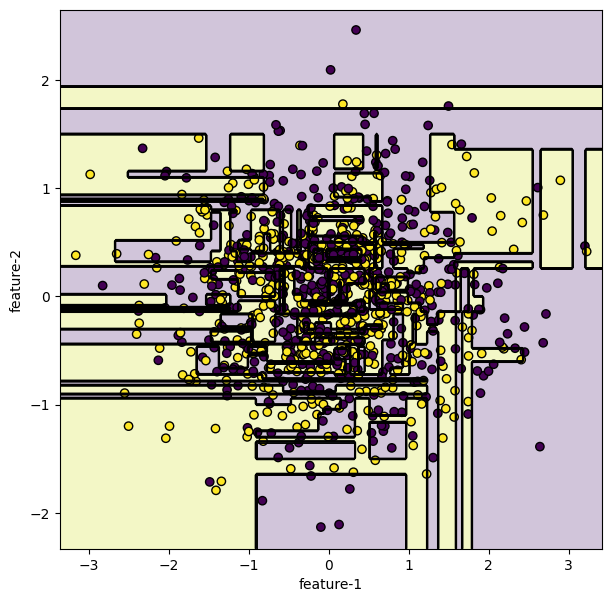

----------------------------------------------------------------------------------------------------

accuracy score for the features - feature-1 & feature-3: 0.972
(after train-test split)


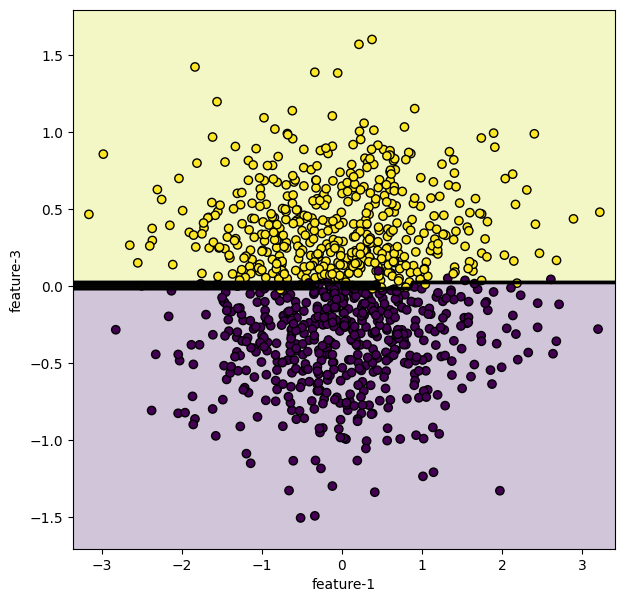

----------------------------------------------------------------------------------------------------

accuracy score for the features - feature-2 & feature-3: 0.992
(after train-test split)


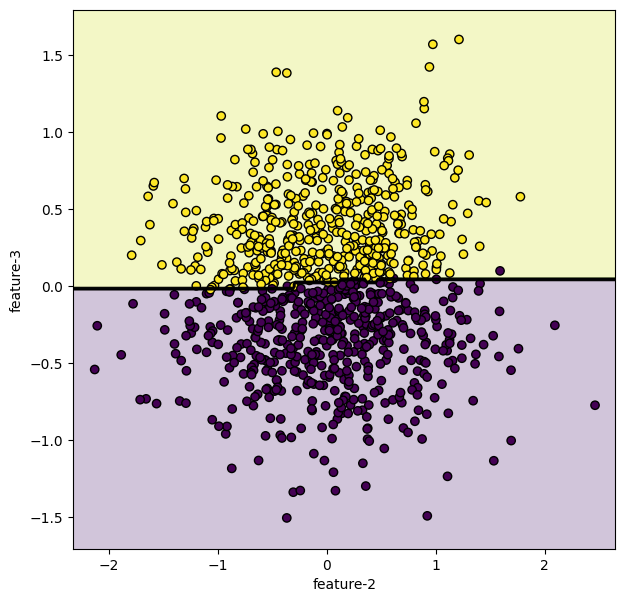

----------------------------------------------------------------------------------------------------



In [18]:
complete_fs(DecisionTreeClassifier(), x_transformed, df['label'], features)

## Principal Component Analysis (n_components=2) on the dataset

In [19]:
pca = PCA(n_components=2)
x_transformed_new = pd.DataFrame(pca.fit_transform(x))
features = [f'feature-{num+1}' for num in range(2)]
x_transformed_new.columns = features
x_transformed_new

feature-1  feature-2
0    -1.480996   0.264357
1     0.145590   0.414334
2    -0.398383  -0.693584
3     0.339875   0.683121
4    -1.366161  -0.251651
..         ...        ...
995  -0.962191  -0.260805
996  -2.825982   0.099956
997  -0.719530   0.579832
998  -2.551149  -0.893435
999   0.424838   0.145122

[1000 rows x 2 columns]

accuracy score for the features - feature-1 & feature-2: 0.524
(after train-test split)


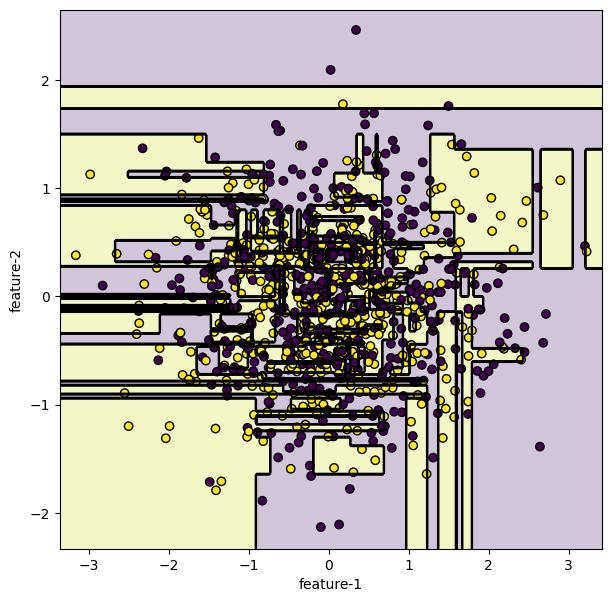

In [20]:
accuracy_and_decision_boundary(DecisionTreeClassifier(), x_transformed_new, df['label'], ['feature-1', 'feature-2'])

#### The features 'feature-1' and 'feature-2' in the PCA(n_components=3) represent the features obtained by applying PCA(n_components=2) and they also show almost same accuracy scores. These scores are very low as compared to the other two subsets.

## Experiments to show the difference in the accuracies

In [28]:
def plot_learning_curve(X, y, Title):
    train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
    model = DecisionTreeClassifier()
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=train_X, y=train_y,
                                                    cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='testing accuracy')
    plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
    plt.title(f'learning curve for {Title}')
    plt.xlabel('train data size')
    plt.ylabel('accuracy score')
    plt.legend()
    plt.show()

### learning curves for PCA(n_components=2)

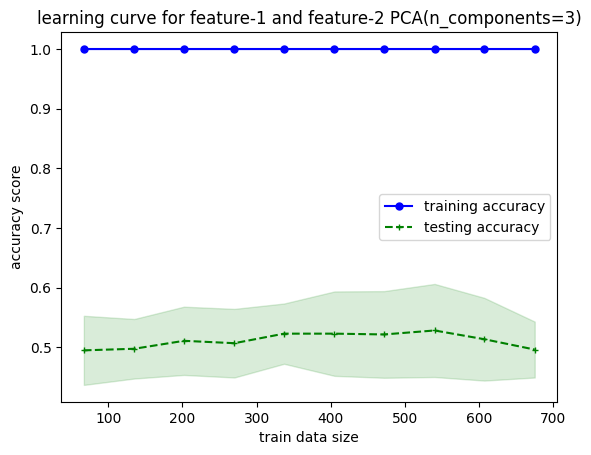

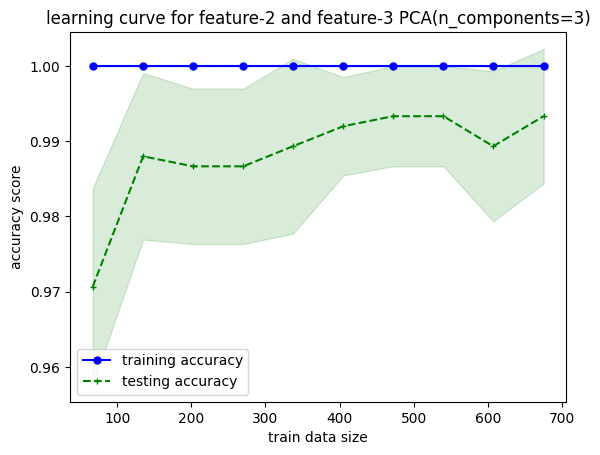

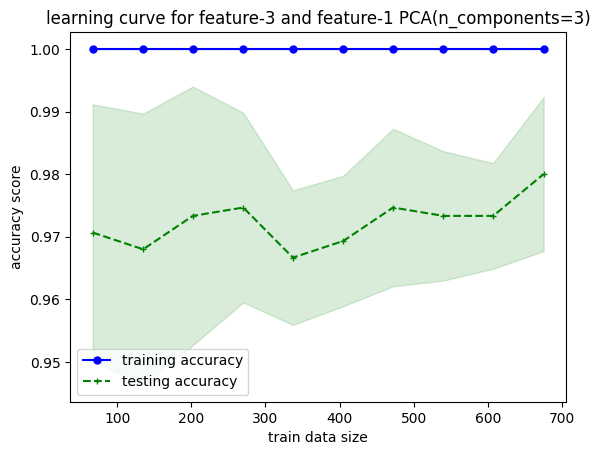

In [29]:
feature_sets = [['feature-1', 'feature-2'], ['feature-2', 'feature-3'], ['feature-3', 'feature-1']]
feature_set_names = ['feature-1 and feature-2', 'feature-2 and feature-3', 'feature-3 and feature-1']

for each in range(len(feature_sets)):
    plot_learning_curve(x_transformed[feature_sets[each]], df['label'],
                        feature_set_names[each] + str(' PCA(n_components=3)'))

### learning curves for PCA(n_components=3)

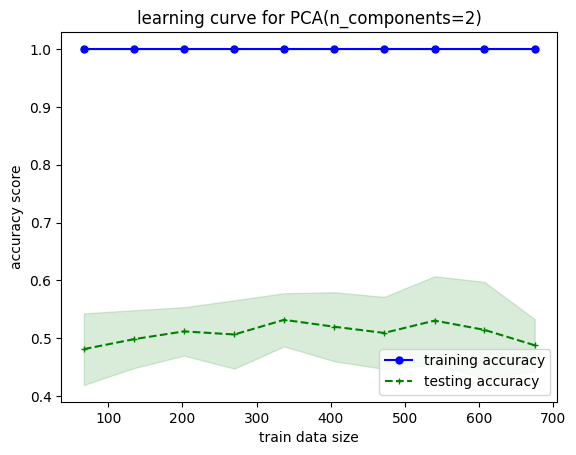

In [30]:
plot_learning_curve(x_transformed_new, df['label'], 'PCA(n_components=2)')